**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 30 de septiembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from ipywidgets import interact

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.

1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?

1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para c=10.

1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?

1.5. Considerando que las bifurcaciones separan regiones que definen comportamientos del sistema cualitativamente distintos. Para c=10, elija un valor de $\rho$ dentro de cada una de esas regiones como caso representativo de la dinámica asociada. Tengan en cuenta que no es necesario que busquen exactamente dónde están las bifurcaciones, con elegir valores de $\rho$ que me caractericen cada región y su dinámica ya es suficiente. Para cada uno de estos valores de $\rho$, estudie distintas soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?

1.6. Usando la estrategia de integrar hacia atrás, muestre que las trayectorias obtenidas efectivamente se comportan de la manera esperada para algún punto fijo inestable del sistema, reforzando los resultados de los sub-ejercicios previos. Como consejo, piensen en las condiciones iniciales que utilizan.


# **1.1**

In [ ]:

def sigmoidea(x, rho = 0, c = 1):
  return (1 / (1 + np.exp(-(rho + c*x))))


# **1.2**

In [ ]:

def grafico_sigmoidea(rho = 0, c=1):
  x = np.linspace(-20, 20, 1000)
  y = sigmoidea(x, rho, c)

  plt.figure(figsize=(8, 5))
  plt.plot(x, y, label = f'rho={rho}, c={c}')
  plt.xlabel('x')
  plt.ylabel('S(rho + cx)')
  plt.xlim(-20,20)
  plt.ylim(0,1)
  plt.legend()
  plt.grid(True)
  plt.show()



In [ ]:
interact(grafico_sigmoidea, rho=(-10, 10, 0.5), c=(-5, 5, 0.5))

interactive(children=(FloatSlider(value=0.0, description='rho', max=10.0, min=-10.0, step=0.5), FloatSlider(va…

<function __main__.grafico_sigmoidea(rho=0, c=1)>

**Análisis : Sigmoidea**



1.   $\rho$:


*   Al aumentar $\rho$ la función "llega" más rápido a 1, pues el exponente de e es más negativo y va a 0 más rapido. Gráficamente se observa como si el gráfico se corriera hacia la izquierda.
*   Al disminuir $\rho$ se produce el efecto contrario, la función tarda más en llegar a 1. Gráficamente se observa como si el gráfico se corriera hacia la derecha.


2.   c:

*   Si aumentamos c, la parte de la función donde escala de 0 a 1 aumenta su pendiente.
*   Si disminuimos c hasta 0, la pendiente en la zona mencionada anteriormente decrece.
*   En c=0 tenemos una constante
$$
\frac{1}{1+e^{-\rho}}
$$

*   Para valores de c negativos, se invierte la forma del gráfico (viene de 1 y va a 0).







# **1.3**

In [ ]:


def campo_vector(x, rho = 0, c = 1):
  return -x + sigmoidea(x, rho, c)

def grafico_campovector (rho=0):
  x = np.linspace(-10, 10, 1000)
  y = campo_vector(x, rho, 10)

  plt.figure(figsize=(8, 5))
  plt.plot(x, y, label = f'rho={rho}')
  plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
  plt.xlabel(r'$x$', fontsize=18)
  plt.ylabel(r'$f(x), \dot{x}$', fontsize=18)
  plt.xlim(-2,2)
  plt.ylim(-5,5)
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
interact(grafico_campovector, rho=(-10, 10, 0.5))

interactive(children=(FloatSlider(value=0.0, description='rho', max=10.0, min=-10.0, step=0.5), Output()), _do…

<function __main__.grafico_campovector(rho=0)>

**Posibles puntos fijos**

Al observar los gráficos del campo vectorial para distintos valores de ρ con c=10:

- Para valores de $\rho$ menores a aproximadamente -7, se aprecia un único punto fijo cerca de x = 0.  
- Al aumentar $\rho$ hacia -7, se observa que aparece un segundo punto fijo mediante una tangencia de la curva con el eje horizontal, lo que indica el inicio de una bifurcación.  
- En el rango intermedio, entre aproximadamente $\rho$ = -7 y $\rho$ = -3, se pueden distinguir claramente **tres puntos fijos** en el gráfico.  
- Para valores de $\rho$ mayores a -3, se produce otra tangencia y el número de puntos fijos vuelve a ser uno, cerca de x = 1.  



In [ ]:
import scipy.optimize as optimize

# **1.4**

* Defininimos una función que encuentre raices.

In [ ]:



def es_sol(sol,tol=8): #Auxiliar para mejorar precisión de resultado (extendido a lo que viene de por si utilizando tolerancia en optimize)
  redondeo= sol.round(tol)

  return 0 == redondeo


def root_finder(f, a, b, N, seed, tol=1e-7, maxiter=100, ndigits=7):
    np.random.seed(seed)
    x0s=np.random.uniform(a, b, size=N)




    sols = []
    for x0 in x0s:
        try:
            r = optimize.newton(f, x0, fprime=None, tol=tol, maxiter=maxiter, disp=False)




            if np.isfinite(r) and es_sol(abs(f(r))): #Variando respuestas, encontramos que agregar este condicional mejoraba diagrama de fases
                sols.append(float(r))
        except Exception:
            #Si Newton falla con esta semilla, la ignoramos (continuamos con las demás, nos salvamos de posibles overflows)
            pass
    sols = np.array(sols, float)
    pts_unicos = np.unique(np.round(sols, ndigits))
    return pts_unicos, sols



c = 10
rhos=[-9, -7,-6,-4,-2, 0]
for rho in rhos :      #Rhos elegidos criteriozamente dado previo análisis


    f_rho = lambda x: campo_vector(x, rho, c)
    pts,pts_sin_redondeo = root_finder(f_rho, -0.5, 2, 50, seed=1)
    print("rho =", rho, " -> puntos fijos =", pts)



rho = -9  -> puntos fijos = [0.0001235]
rho = -7  -> puntos fijos = [0.0009195]
rho = -6  -> puntos fijos = [0.002536  0.6714958 0.9775989]
rho = -4  -> puntos fijos = [0.0224011 0.3285042 0.997464 ]
rho = -2  -> puntos fijos = [0.9996635]
rho = 0  -> puntos fijos = [0.9999546]


Veamos la estabilidad de estos puntos fijos númericamente.

Text(0.5, 1.0, 'Puntos fijos vs. $\\rho$ (con $c=10$)')

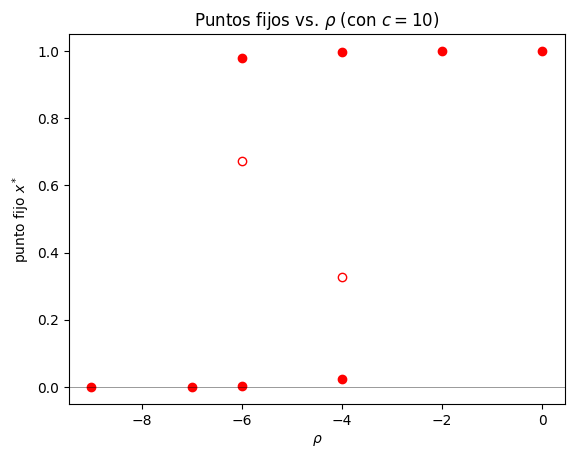

In [ ]:



#defino la función para derivar númericamente:

def derivar(f,x0,method='central',h=0.01):
    if method == 'forward':
        res= (f(x0+h)-f(x0))/h
    elif method == 'backward':
        res= (f(x0)-f(x0-h))/h
    elif method == 'central':
        res= (f(x0+h)-f(x0-h))/(2*h)
    else:
        raise ValueError("El método debe ser 'forward', 'backward' o 'central'")

    return res




markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
x = np.arange(-1.5, 1.5, 0.01)

for rho in rhos:
    f_rho = lambda x: campo_vector(x, rho, c)

    pts,ptos_sin_redondeo = root_finder(f_rho, -0.5, 2, 50, seed=1)

    pendientes = []


    for x0 in pts:
        p = derivar(f=f_rho, x0=x0)
        pendientes.append(p)
        plt.plot(rho, x0, 'o', markerfacecolor=markerfcolors[int(p < 0)], markeredgecolor=markerecolors[int(p < 0)])

plt.axhline(0, color='k', lw=0.7, alpha=0.4)
plt.xlabel(r'$\rho$')
plt.ylabel('punto fijo $x^*$')
plt.title('Puntos fijos vs. $\\rho$ (con $c=10$)')




* Observación: No fue necesaria la cota para los valores, no observo artefactos, cumplen hipotesis los ptos fijos.

**Puntos fijos númericos**

Buscando los puntos fijos numericamente, podemos ver como los valores obtenidos
se corresponden a lo teorizado a partir del analisís del grafico

- Para valores de $\rho$ menores a -7, existe un unico punto fijo cerca de x=0. Este punti fijo se muestra estable.
- En el rango intermedio, entre $\rho$ = -7 y $\rho$ = -3, los puntos fijos pasán a ser 3. Los 2 extremos son inestables, mientras que el central es inestable.
- Para valores de $\rho$ mayores a -3, vuelvo a tener un solo punto fijo, el cual es estable.



Ahora, observemos el diagrama de bifucraciones.

/tmp/ipython-input-3887635755.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-(rho + c*x))))


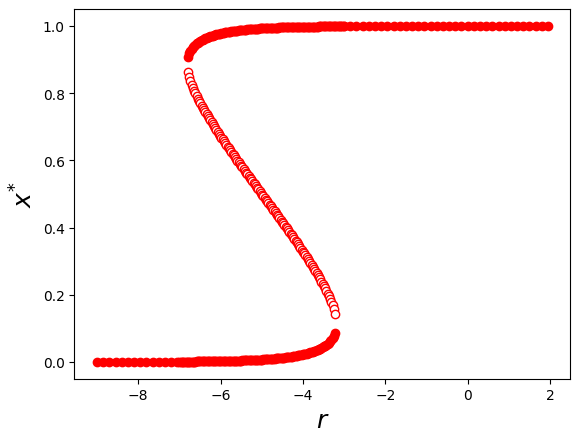

In [ ]:

markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']


# malla de r con mayor resolución en [-7,-3]
rhos = np.concatenate([
    np.arange(-9.0, -7.0, 0.15),
    np.arange(-7.0, -3.0, 0.03),  # zona “borde” refinada
    np.arange(-3.0,  2.1, 0.15)
])


#rhos = np.arange(-9, 2.1, 0.15)


x = np.arange(-9, 2, 0.05)
N = 20

for rho in rhos:

    f_rho = lambda x: campo_vector(x, rho, c)

    # más semillas (y más iteraciones) sólo en [-7,-3]
    N_local = 200 if (-7.0 <= rho <= -3.0) else 50


    pts, ptos_sin_redondeo = root_finder(f_rho, -0.5, 2, N_local, seed=1, maxiter=(300 if -7.0 <= rho <= -3.0 else 100))


    pendientes = []


    for x0 in pts:
        p = derivar(f=f_rho, x0=x0)
        pendientes.append(p)
        plt.plot(rho, x0, 'o', markerfacecolor=markerfcolors[int(p < 0)], markeredgecolor=markerecolors[int(p < 0)])

plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x^{*}$', fontsize=18)
plt.show()



* Observación: Agregamos una malla de "mayor resolución" en los puntos conflictivos donde la derivada esta cerca de anularse. Esto retrata mejor el diagrama de fases

* Observamos que se pueden diferenciar 2 bifurcaciones, la superior y la inferior. Ambas pertenecen a la categoría de bifurcaciones Saddle, donde de un punto salen 2 curvas paralelas, con estabilidades inversas.

# **1.5**

Se pueden observar 3 regiones caracteristicas, elijamos 3 valores de rho basandonos el análisis previo.

In [ ]:

rhos = np.array([-9, -6, 0])

#Usamos la funcion odeEuler definida en la clase de integración!

def odeEuler(f, ci, h=0.1, tmax=10):
  tiempos = []
  valores = []
  t = 0
  x = ci
  tiempos.append(t)
  valores.append(x)

  while (t<=tmax):
    x = x + h*f(x)
    t += h
    valores.append(x)
    tiempos.append(t)


  return np.array(tiempos), np.array(valores)

#Defino algunas condiciones iniciales para analizar las trayectorias.
condiciones_iniciales = np.arange(-1.5, 1.5, 0.1)


$\underline{\rho = -9}$

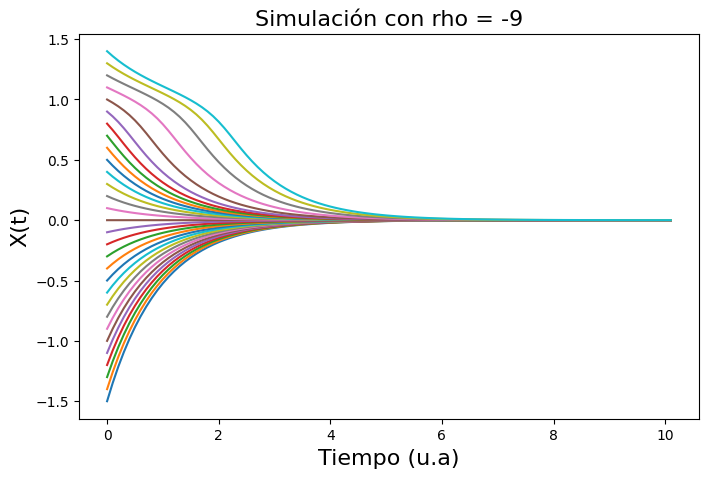

In [ ]:
rho = rhos[0]
c = 10
f_rho = lambda x: campo_vector(x, rho, c)

plt.figure(figsize=(8, 5))

for ci in condiciones_iniciales:
  t, x = odeEuler(f_rho,ci)
  plt.plot(t, x,)

plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("X(t)", fontsize=16)
plt.title(f"Simulación con rho = {rho}", fontsize=16)
plt.show()




*   De las trayectorias encontradas se deduce que hay un punto fijo estable en $x^* = 0$
, lo cual coincide con el análisis del item 1.4
*  Además, se destaca la forma particular de las trayectorias con condiciones iniciales cercanas a $x=1$. En esa región aparece la “pancita” del campo vectorial, lo que genera variaciones en la magnitud de la velocidad.





$\underline{\rho = -6}$

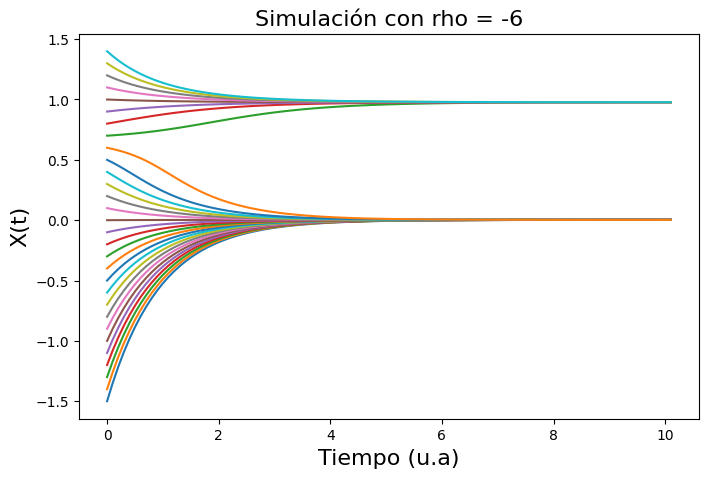

In [ ]:
rho = rhos[1]

plt.figure(figsize=(8, 5))

for ci in condiciones_iniciales:
  t, x = odeEuler(f_rho,ci)
  plt.plot(t, x,)

plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("X(t)", fontsize=16)
plt.title(f"Simulación con rho = {rho}", fontsize=16)
plt.show()




*   Esta situación ya es más interesante. A simple vista se podría pensar que hay dos puntos fijos, uno en $x^*=0$  y otro en $x^*=1$ , ambos estables. Sin embargo, entre medio de estos dos puntos hay un fenómeno que provoca un cambio cualitativo en el flujo y este es un punto fijo intestable. En el gráfico no se ve tan claro como los otros dos, ya que al ser inestable las trayectorias se alejan del mismo, para ver esto podría servir la integración hacia atrás. Todo lo observado coincide con el análisis desarrollado previamente




$\underline{\rho = 0}$

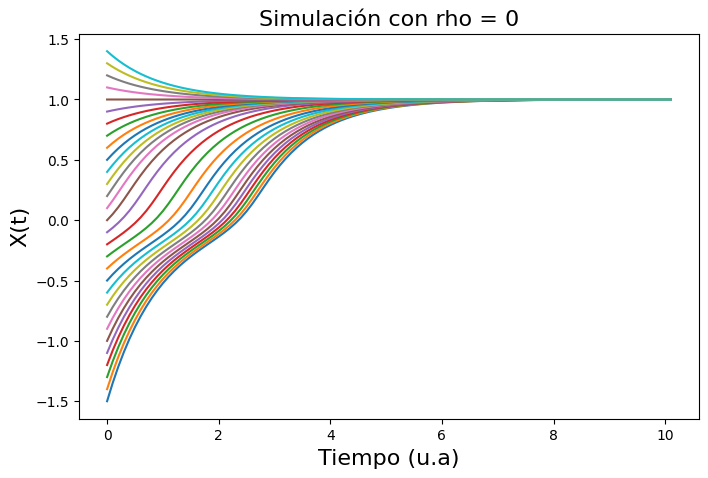

In [ ]:
rho = rhos[2]

plt.figure(figsize=(8, 5))

for ci in condiciones_iniciales:
  t, x = odeEuler(f_rho,ci)
  plt.plot(t, x,)

plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("X(t)", fontsize=16)
plt.title(f"Simulación con rho = {rho}", fontsize=16)
plt.show()



*   Volvemos a una situación similar a la primera. Se observa un punto fijo estable en $x^*=1$ .
* Como mencionamos anteriormente, los cambios en las formas de las trayectorias que están por debajo de $x =1$, se relacionan con la "pancita" del campo vector.
* Nuevamente los observado conincide con el análisis previo






# **1.6**

In [ ]:



def rk4(dxdt, x, t, dt, *args, **kwargs):

    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6


dt=0.01
t = np.arange(10, 0, step=-dt)

condiciones_iniciales = np.arange(-1.5, 1.5, 0.05)





$\underline{\rho = -9}$

/tmp/ipython-input-3887635755.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-(rho + c*x))))


<Figure size 800x500 with 0 Axes>

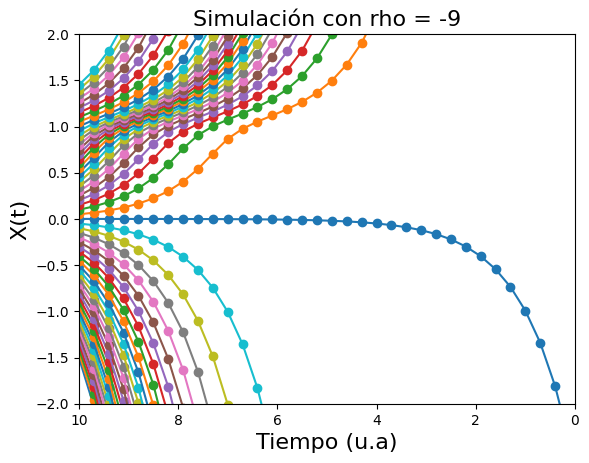

In [ ]:
rho=-9


plt.figure(figsize=(8, 5))

f_rho = lambda x, t, r: campo_vector(x, r, c)

dt = 0.3
t = np.arange(10, 0, step=-dt)



for rho in [-9]:
  plt.figure()
  for ci in condiciones_iniciales:
    Nrk = np.zeros_like(t)
    Nrk[0] = ci
    for ix, tt in enumerate(t[:-1]):
      # Avanzamos un paso temporal
      Nrk[ix+1] = rk4(f_rho, Nrk[ix], tt, -dt, rho)
    plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))

plt.xlim(10, 0)
plt.ylim(-2,2)
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("X(t)", fontsize=16)
plt.title(f"Simulación con rho = {rho}", fontsize=16)
plt.show()




*   Integrando hacia atrás se puede observar un punto fijo estable en 0, ratificando el análisis previo.




$\underline{\rho = -6}$

/tmp/ipython-input-3887635755.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-(rho + c*x))))


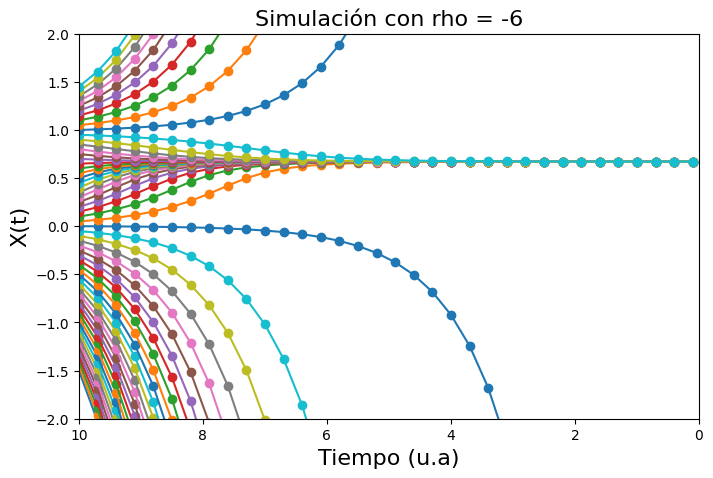

In [ ]:
rho=-6



plt.figure(figsize=(8, 5))

f_rho = lambda x, t, r: campo_vector(x, r, c)

dt = 0.3
t = np.arange(10, 0, step=-dt)



for rho in [rho]:
  for ci in condiciones_iniciales:
    Nrk = np.zeros_like(t)
    Nrk[0] = ci
    for ix, tt in enumerate(t[:-1]):
      # Avanzamos un paso temporal
      Nrk[ix+1] = rk4(f_rho, Nrk[ix], tt, -dt, rho)
    plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))




plt.xlim(10,0)
plt.ylim(-2,2)
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("X(t)", fontsize=16)
plt.title(f"Simulación con rho = {rho}", fontsize=16)
plt.show()



*   Mediante la integración hacia atrás se puede observar con más claridad el punto fijo inestable que surge entre 0 y 1. En el gráfico pareciera que las trayectorias convergen en ese punto, pero hay que tener en cuenta que el paso de integración es negativo.

*   Este es el caso en el que el método de integración hacia atrás resulta más útil.




$\underline{\rho = 0}$

/tmp/ipython-input-3887635755.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-(rho + c*x))))


<Figure size 800x500 with 0 Axes>

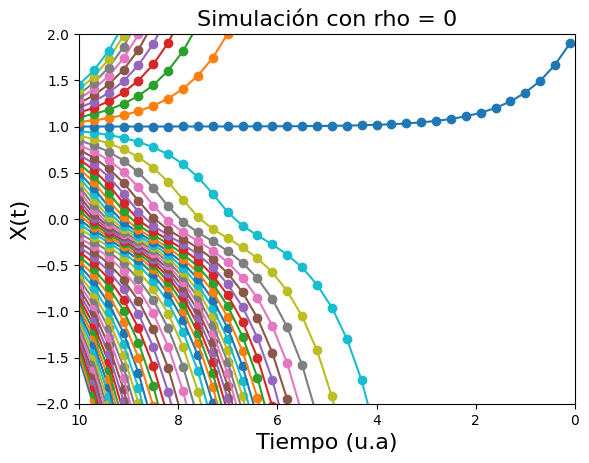

In [ ]:
rho=-0


plt.figure(figsize=(8, 5))

f_rho = lambda x, t, r: campo_vector(x, r, c)

dt = 0.3
t = np.arange(10, 0, step=-dt)



for rho in [rho]:
  plt.figure()
  for ci in condiciones_iniciales:
    Nrk = np.zeros_like(t)
    Nrk[0] = ci
    for ix, tt in enumerate(t[:-1]):
      # Avanzamos un paso temporal
      Nrk[ix+1] = rk4(f_rho, Nrk[ix], tt, -dt, rho)
    plt.plot(t, Nrk, 'o-',)

plt.xlim(10,0)
plt.ylim(-2,2)
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("X(t)", fontsize=16)
plt.title(f"Simulación con rho = {rho}", fontsize=16)
plt.show()




*   En este caso, como se mencionó anteriormente, se puede observar un punto fijo estable en 1.



---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.

2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].

2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.

2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?

2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.

2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

# **2.1**

In [ ]:

def sistema(t, z):
  x = z[0]
  y = z[1]
  dxdt = -x - x**2 - y
  dydt = x - y
  return [dxdt, dydt]

# **2.2**

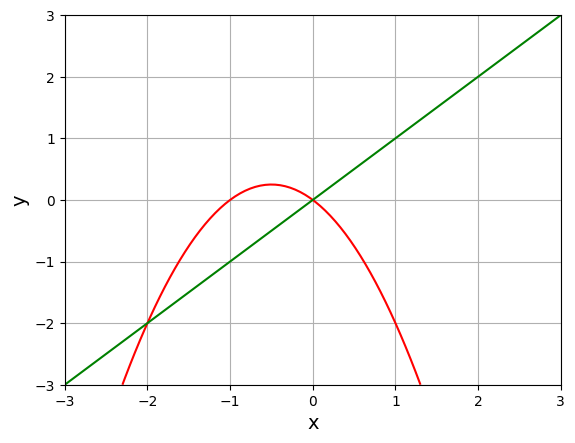

In [ ]:


#Usando plt.contour()

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(x, y)
DX, DY = sistema(0, [XX, YY])

c1 = plt.contour(XX, YY, DX, levels=[0], colors=['r'])
c2 = plt.contour(XX, YY, DY, levels=[0], colors=['g'])
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()




*   A partir del estudio de las nulclinas, se puede observar que hay dos puntos fijos en $(x^*, y^*) =(0,0)$ y $(x^*, y^*) =(-2,-2)$



In [ ]:
pf1 = sistema(0, [0,0])
pf2 = sistema(0, [-2,-2])

print(pf1)
print(pf2)

[0, 0]
[0, 0]


# **2.3**

In [ ]:


def sistema_sin_t (z):
  return sistema(0,z)

N = 50
x0s = np.random.uniform(low=-3, high=3, size=(N,))
y0s = np.random.uniform(low=-3, high=3, size=(N,))
raices = []
for x0, y0 in zip(x0s, y0s):
    z0 = [x0, y0]
    raices.append(sp.optimize.fsolve(sistema_sin_t, z0))

raices = np.unique(np.array(raices).round(2), axis = 0)


/tmp/ipython-input-2110593971.py:10: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
 solution is possible.
  raices.append(sp.optimize.fsolve(sistema_sin_t, z0))
/tmp/ipython-input-2110593971.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  raices.append(sp.optimize.fsolve(sistema_sin_t, z0))


In [ ]:
raices

array([[-2., -2.],
       [-0.,  0.]])

* Se encontraron numericamente los puntos fijos y coincide con lo mencionado anteriormente.

# **2.4**

In [ ]:

dxdt = -x - x**2 - y
dydt = x - y



def jacobo(x,y):
  axax= -1-2*x
  axay= -1
  ayax= 1
  ayay= -1
  return np.array([[axax, axay], [ayax, ayay]])

pmenos2=jacobo(-2,-2)

pcero=jacobo(0,0)



* Estudiamos estabilidad calculando autovalores y autovectores de cada matriz jacobiana.



In [ ]:

avalsmenos2, avecsmenos2 = np.linalg.eig(pmenos2)

avalscero, aveccero = np.linalg.eig(pcero)



# Mostrar los resultados
print("Autovalores de (-2,-2):")
print(avalsmenos2)

print("\nAutovectores de (-2,-2):")
print(avecsmenos2)

print("\nAutovalores de (0,0):")
print(avalscero)

print("\nAutovectores de (0,0):")
print(aveccero)




Autovalores de (-2,-2):
[ 2.73205081 -0.73205081]

Autovectores de (-2,-2):
[[0.96592583 0.25881905]
 [0.25881905 0.96592583]]

Autovalores de (0,0):
[-1.+1.j -1.-1.j]

Autovectores de (0,0):
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


La estabilidad de cada punto fijo queda así:

* (-2,-2): Avals reales. Uno positivo y el otro negativo. -> Punto Saddle (Silla)
* (0,0): Avals imaginarios. Parte real -1 < 0. -> Foco atractor (Espiral atractor)

# **2.5**

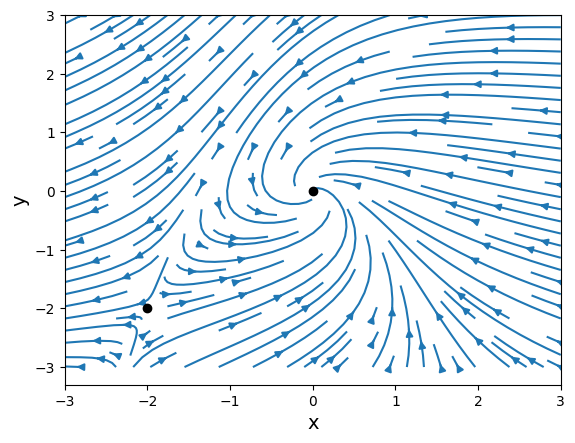

In [ ]:
# Calculamos el campo vector en cada punto
DX, DY = sistema(0, [XX, YY])

#graficamos
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.01)
plt.plot(raices[:,0], raices[:,1], 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()


Constatando con la estabilidad de los puntos fijos obtenida analiticamente, podemos observar como el campo vector gira al rededor del (0,0) apuntando hacia el centro, es decir, forma una espiral atractora. Mientras tanto, en el (-2,-2), podemos ver como se forma la"silla". Hagamos un zoom ahi para verlo más claro.

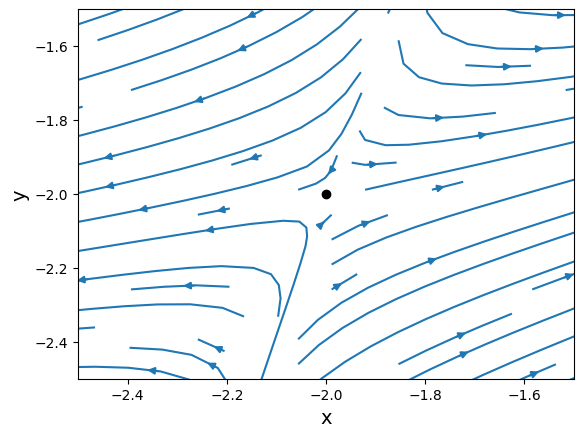

In [ ]:
plt.streamplot(XX, YY, DX, DY, density=3, minlength=.001)
plt.plot(raices[:,0], raices[:,1], 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2.5, -1.5)
plt.ylim(-2.5, -1.5)
plt.show()

* Aca podemos ver claramente como la curva se comporta alrededor del punto silla.

# **2.6**

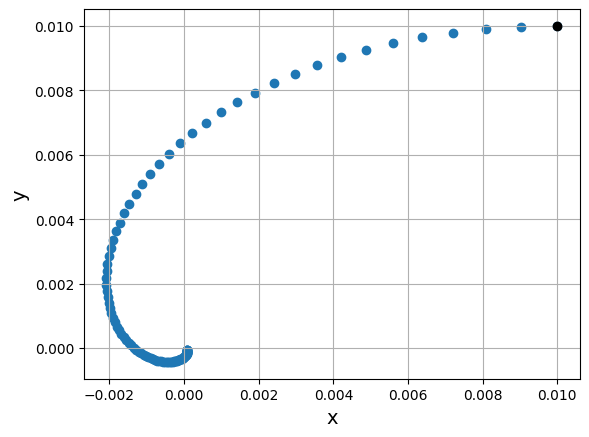

In [ ]:

dt = 0.05  #paso largo (relativo)
tmax = 5 #tiempo de integración corto
t = np.arange(0, tmax, dt)



#INICIAMOS UNA TRAYECTORIA CERCA DE LA ESPIRAL ATRACTORA
xi = 0.01
yi = 0.01
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(sistema, [t[0], t[-1]], zi, t_eval=t, method='RK45')

plt.scatter(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()



Al inciar cerca del (0,0), podemos ver como claramente la trayectoria entra en una espiral que rodea al punto fijo.

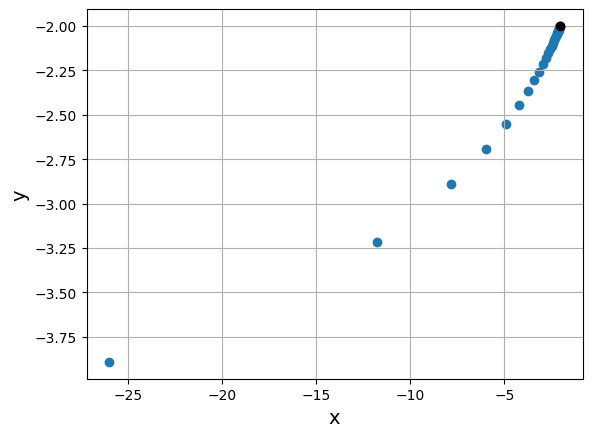

In [ ]:
#INICIAMOS UNA TRAYECTORIA CERCA DEL PUNTO SILLA
xi = -2.05
yi = -2
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(sistema, [t[0], t[-1]], zi, t_eval=t, method='RK45')

plt.scatter(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

Por otro lado, al iniciar la trayectoría cerca del (-2,-2), vemos como esta sale expulsada en la dirección relativa al (-2,-2). (Es decir, si se encuntra al suroeste del (-2,-2), sale expuslada hacia el suroeste)

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (encontrar numéricamente, no "a ojo"). Mostrar cuál sería ese momento en la curva de I(t).

---

# **3.1**

In [ ]:


def sistema(t,z,beta,gamma,N):
  S = z[0]
  I = z[1]
  R = z[2]

  dSdt = -beta*S*I/N
  dIdt = (beta*S*I)/N - gamma*I
  dRdt = gamma*I

  return [dSdt, dIdt, dRdt]


**Intuición:**
Al haber una persona infectada, observando el sistema, los infectados aumentarían, los suceptibles decrecerían y también aumentan los recuperados



*   Integramos para la condición dada por el enunciado



In [ ]:
N = 10000
beta = 0.2
gamma = 1/10

#condicion inicial:
s = 10000 - 1 #total - enfermos
i = 1
r = 0

dt = 1
tmax = 300
t = np.arange(0, tmax, dt)

zi = [s, i,r]

sol = sp.integrate.solve_ivp(sistema, [t[0], t[-1]], zi, t_eval=t, method='RK45', args=(beta,gamma,N))




*   Graficamos la evolución de cada uno en el tiempo.



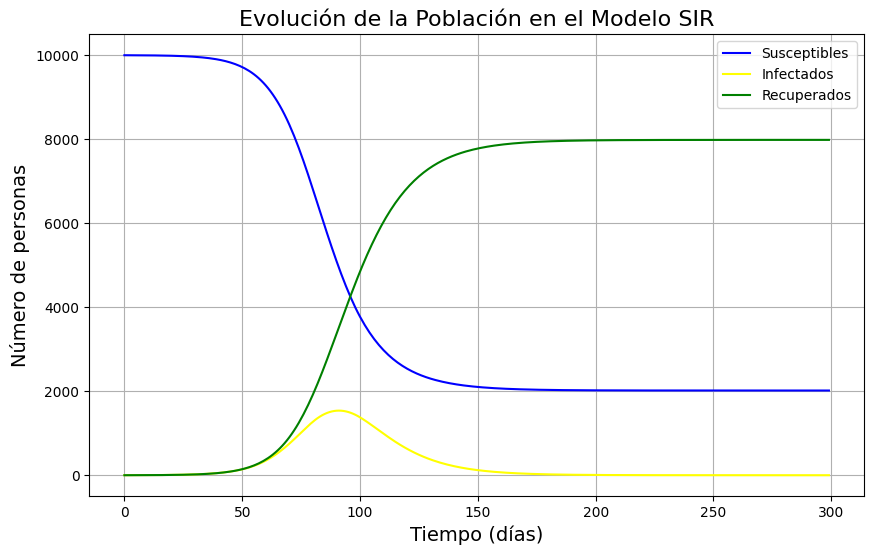

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Susceptibles', color='blue')  # Susceptibles
plt.plot(sol.t, sol.y[1], label='Infectados', color='yellow')    # Infectados
plt.plot(sol.t, sol.y[2], label='Recuperados', color='green')  # Recuperados

plt.xlabel('Tiempo (días)', fontsize=14)
plt.ylabel('Número de personas', fontsize=14)
plt.title('Evolución de la Población en el Modelo SIR', fontsize=16)

plt.legend()
plt.grid(True)


plt.show()



*   Al hacer la integración correspondiente, se observa en el gráfico que la intuición previa era correcta. Sin embargo, los infectados no crecen indefinidamente, llegan a un máximo y luego decrecen a 0. Finalmente las 3 cantidades se estabilizan, por lo que se deduce que covergen a un punto fijo en (2000, 0, 8000).



# **3.2**

Para verificar que la población se mantiene constante a lo largo del tiempo, podemos hacer el siguiente cálculo: $P= S + I + R$, siendo P la población, S suceptibles ,I infectados y R recuperados, y luego verificar que P no varía a lo largo del tiempo.

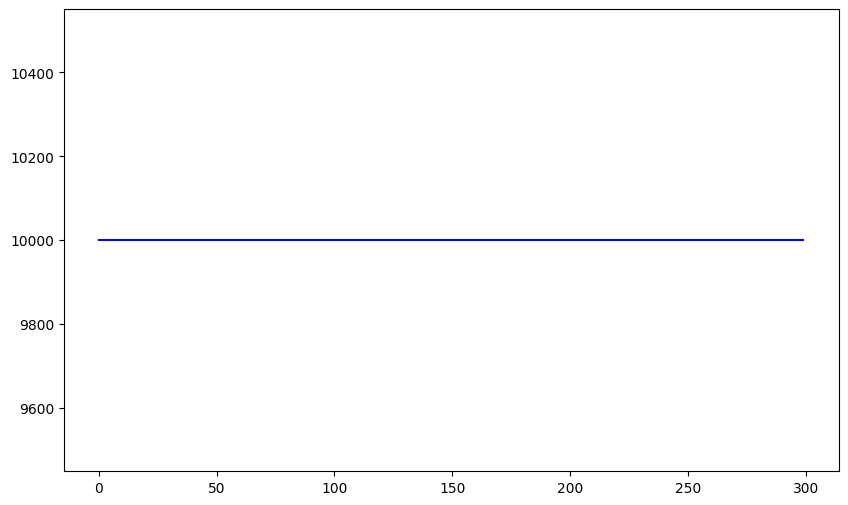

In [ ]:
p = sol.y[0]+sol.y[1]+sol.y[2]
plt.figure(figsize=(10, 6))
plt.plot(sol.t, p, label='Población', color='blue')

Efectivamente la población se mantiene constante. Efectivamente.


# **3.3**


* Para conseguir el maximo numero de infectados y cuando esto ocurre, buscamos numericamente en nuestra solución el indice donde toma el valor más grande, y en ese indice evaluamos a que tiempo corresponde:

El tiempo donde los infectados alcanzan el pico es: 91
Este maximo es 1537.9977197226635


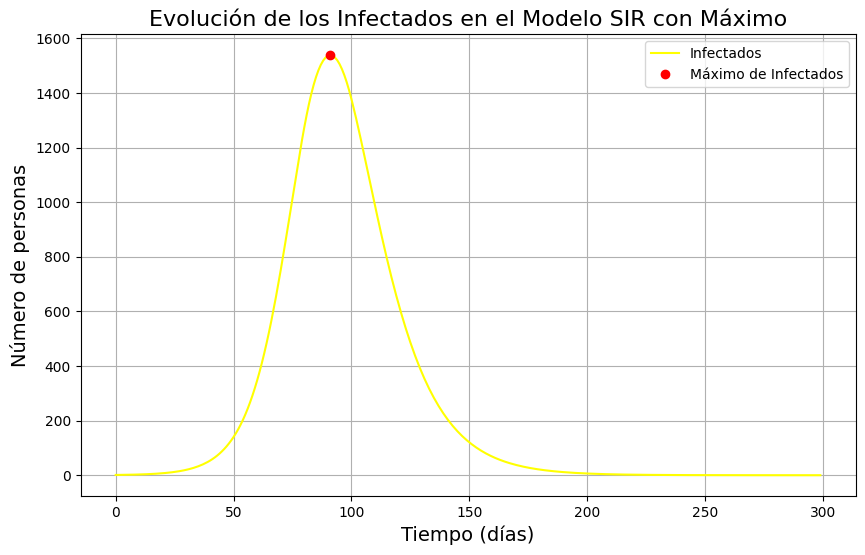

In [ ]:

I=sol.y[1]


#Tomo el valor maximo del array de soluciones Infectados
maxInfectados = np.argmax(I)

# Indexo el tiempo maximo
tiempoMaxInfectados = sol.t[maxInfectados]

print("El tiempo donde los infectados alcanzan el pico es:" , tiempoMaxInfectados)
print("Este maximo es", I[maxInfectados])


plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[1], label='Infectados', color='yellow')
plt.plot(tiempoMaxInfectados, I[maxInfectados], 'ro', label='Máximo de Infectados')

plt.xlabel('Tiempo (días)', fontsize=14)
plt.ylabel('Número de personas', fontsize=14)
plt.title('Evolución de los Infectados en el Modelo SIR con Máximo', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

* Aquí en el grafico ploteado a partir del analisis numerico observamos como el numero de infectados toca su techo en el t = 91, es decir, en el día 91. Numericamente, la curva vale 1537.9977197226635, que representa que 1534 personas estan infectadas en ese momento.